### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_1.csv"
url2 = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/adsecv/cas/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Define diccionario global de tiendas con colores para gráficos
tiendas = {
    'Tienda 1': (tienda1, 'blue'),
    'Tienda 2': (tienda2, 'green'),
    'Tienda 3': (tienda3, 'orange'),
    'Tienda 4': (tienda4, 'red')
}

#tienda1.head()


#1. Análisis de facturación



In [2]:
# Calcula los ingresos totales por tienda
ingresos = {nombre: df['Precio'].sum() for nombre, (df, _) in tiendas.items()}

# Imprime los ingresos con formato
for nombre, ingreso in ingresos.items():
    print(f"Ingresos {nombre}: {ingreso:,.1f}")

Ingresos Tienda 1: 1,150,880,400.0
Ingresos Tienda 2: 1,116,343,500.0
Ingresos Tienda 3: 1,098,019,600.0
Ingresos Tienda 4: 1,038,375,700.0


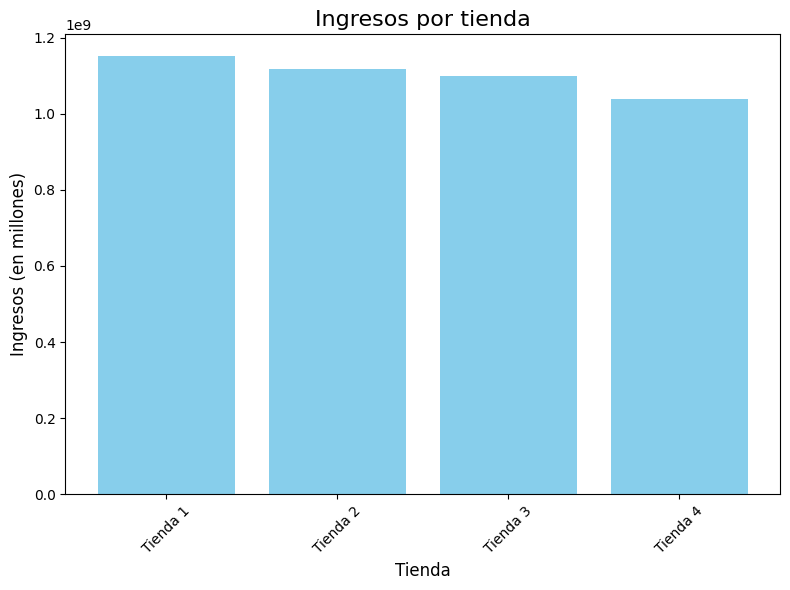

In [3]:
# Crea gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(ingresos.keys(), ingresos.values(), color='skyblue')

# Añade título y etiquetas
plt.title('Ingresos por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()


# 2. Ventas por categoría

In [44]:
# Agrupa y cuenta productos por categoría para cada tienda
tabla_completa = pd.DataFrame()

for nombre, (df, _) in tiendas.items():
    counts = df.groupby('Categoría del Producto').size().rename(nombre)
    tabla_completa = tabla_completa.join(counts, how='outer') if not tabla_completa.empty else counts.to_frame()

# Ordena por 'Tienda 1' de mayor a menor
tabla_completa = tabla_completa.sort_values(by='Tienda 1', ascending=False).reset_index()

# Imprime la tabla sin índice
print(tabla_completa.to_string(index=False))


 Categoría del Producto  Tienda 1  Tienda 2  Tienda 3  Tienda 4
                Muebles       465       442       499       480
           Electrónicos       448       422       451       451
               Juguetes       324       313       315       338
      Electrodomésticos       312       305       278       254
   Deportes y diversión       284       275       277       277
 Instrumentos musicales       182       224       177       170
                 Libros       173       197       185       187
Artículos para el hogar       171       181       177       201


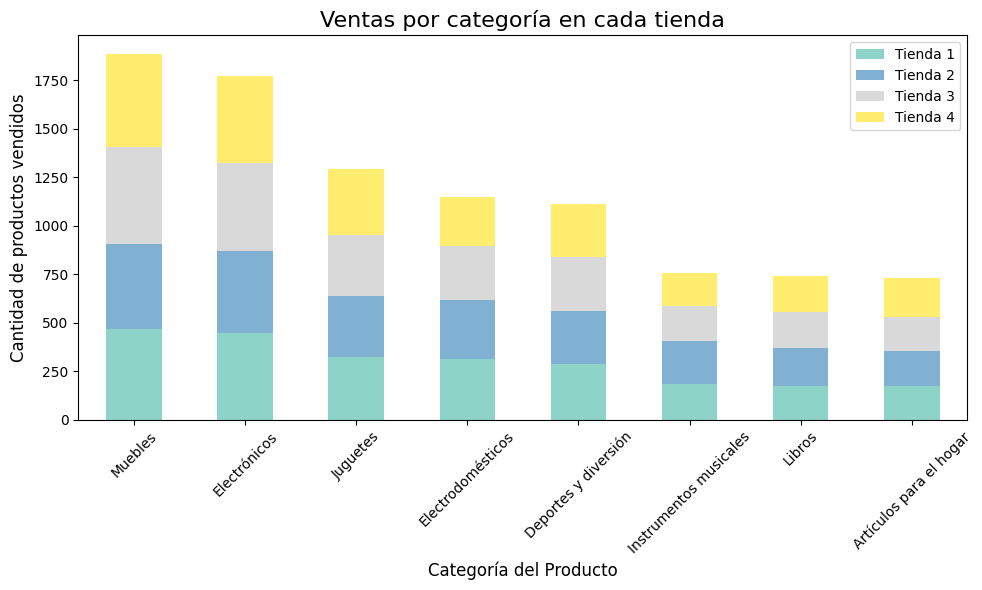

In [5]:
# Grafica ventas por categoría
tabla_completa.set_index('Categoría del Producto').plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

# Añade título y etiquetas
plt.title('Ventas por categoría en cada tienda', fontsize=16)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad de productos vendidos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
# Calcula la calificación promedio por tienda
calificaciones = {nombre: df['Calificación'].mean() for nombre, (df, _) in tiendas.items()}

# Imprime los resultados con formato
for nombre, calificacion in calificaciones.items():
    print(f"Promedio de calificación {nombre}: {calificacion:.2f}")

Promedio de calificación Tienda 1: 3.98
Promedio de calificación Tienda 2: 4.04
Promedio de calificación Tienda 3: 4.05
Promedio de calificación Tienda 4: 4.00


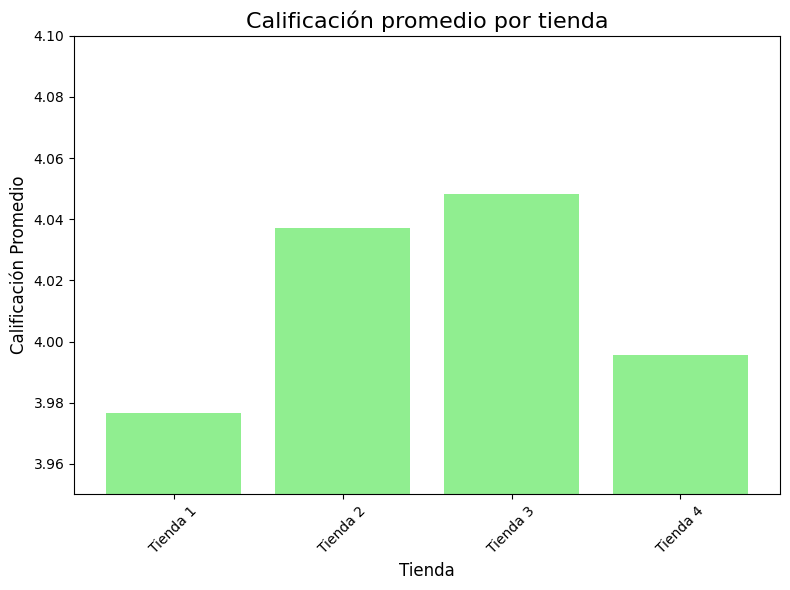

In [7]:
# Crea gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(calificaciones.keys(), calificaciones.values(), color='lightgreen')

# Añade título y etiquetas
plt.title('Calificación promedio por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)

# Limita el eje Y para mayor visibilidad
plt.ylim(3.95, 4.1)

# Rota etiquetas para legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()

# 4. Productos más y menos vendidos

In [11]:
# Calcula y muestra top 5 productos más y menos vendidos por tienda
for nombre, (df, _) in tiendas.items():
    # Cuenta ventas por producto
    ventas = df.groupby('Producto').size().reset_index(name='Ventas')

    # Obtiene top 5 más y menos vendidos
    top5_mas = ventas.sort_values('Ventas', ascending=False).head(5).reset_index(drop=True)
    top5_menos = ventas.sort_values('Ventas', ascending=True).head(5).reset_index(drop=True)

    # Imprime resultados con alineación
    print(f"Top 5 productos más vendidos {nombre}:")
    print(top5_mas[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))
    print(f"\nTop 5 productos menos vendidos {nombre}:")
    print(top5_menos[['Producto', 'Ventas']].to_string(index=False, justify='center', col_space=15))
    print()


Top 5 productos más vendidos Tienda 1:
    Producto          Ventas    
         Armario        60      
   TV LED UHD 4K        60      
      Microondas        60      
Secadora de ropa        58      
   Mesa de noche        56      

Top 5 productos menos vendidos Tienda 1:
          Producto               Ventas    
  Auriculares con micrófono        33      
               Celular ABXY        33      
            Olla de presión        35      
                  Pandereta        36      
Ciencia de datos con Python        39      

Top 5 productos más vendidos Tienda 2:
         Producto              Ventas    
Iniciando en programación        65      
               Microondas        62      
                  Batería        61      
                Pandereta        58      
        Guitarra acústica        58      

Top 5 productos menos vendidos Tienda 2:
    Producto         Ventas    
  Juego de mesa        32      
      Impresora        34      
Mesa de comedor        34  

# 5. Envío promedio por tienda

In [12]:
# Calcula el costo de envío promedio por tienda
costos_envio = {nombre: df['Costo de envío'].mean() for nombre, (df, _) in tiendas.items()}

# Imprime los resultados con formato
for nombre, costo in costos_envio.items():
    print(f"Costo de envío promedio {nombre}: ${costo:,.2f}")

Costo de envío promedio Tienda 1: $26,018.61
Costo de envío promedio Tienda 2: $25,216.24
Costo de envío promedio Tienda 3: $24,805.68
Costo de envío promedio Tienda 4: $23,459.46


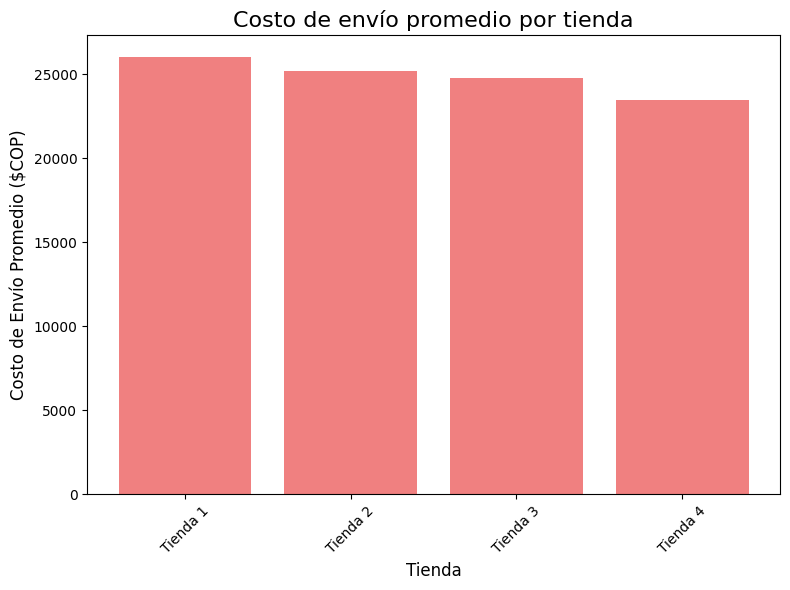

In [13]:
# Crea gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(costos_envio.keys(), costos_envio.values(), color='lightcoral')

# Añade título y etiquetas
plt.title('Costo de envío promedio por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio ($COP)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra gráfico
plt.show()

# 6. Ventas a lo largo del tiempo

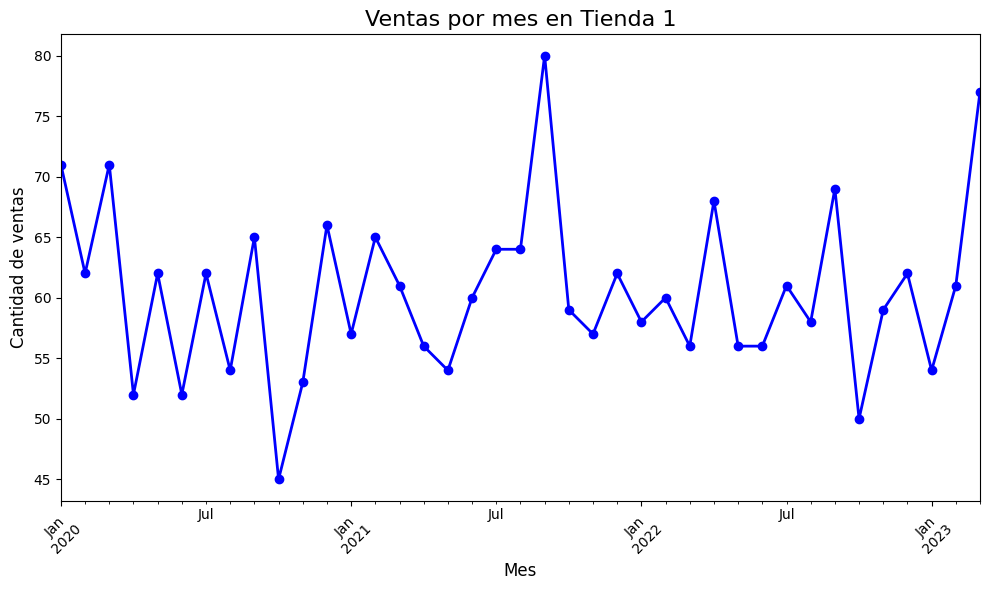

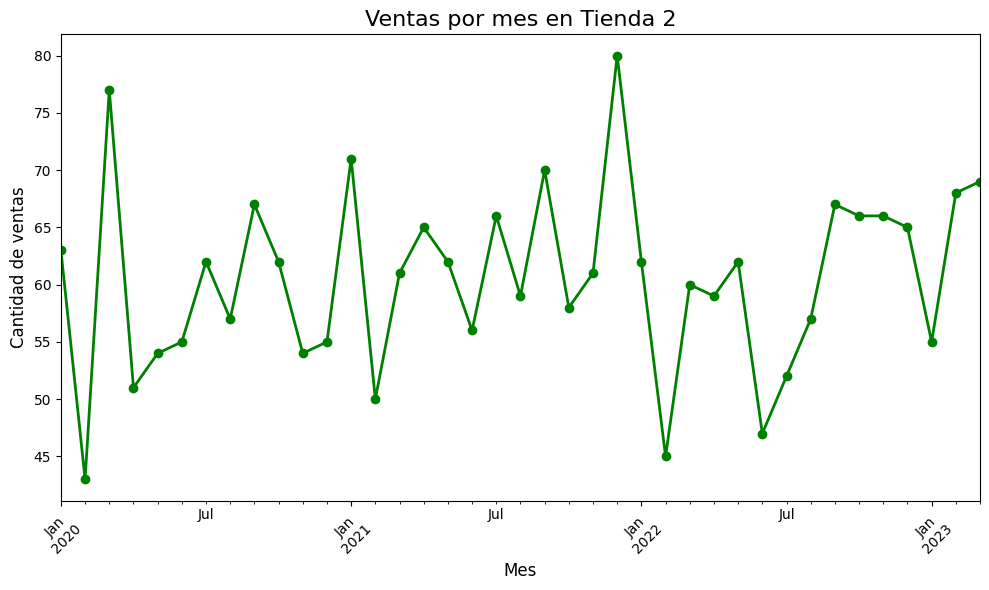

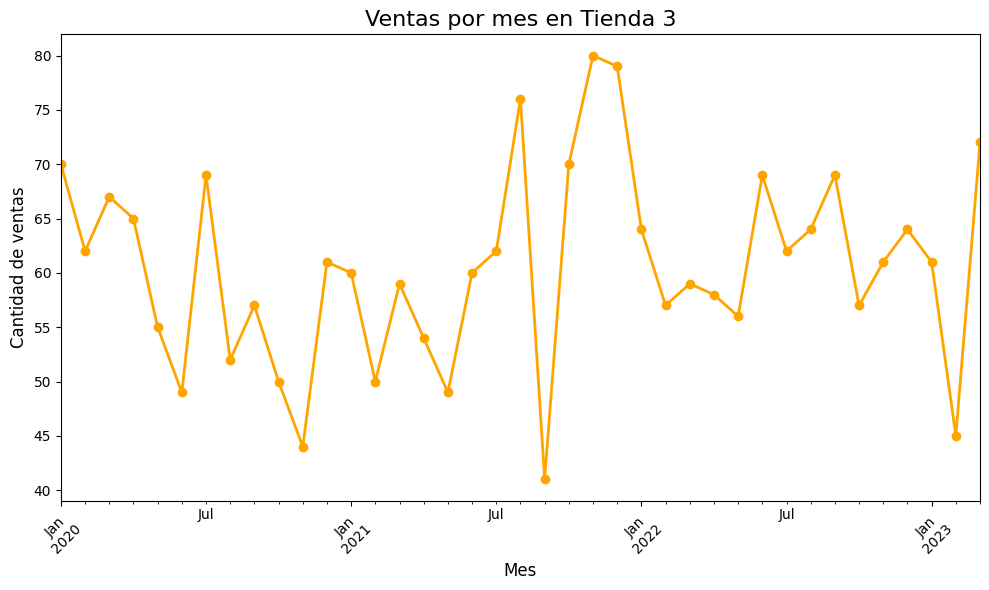

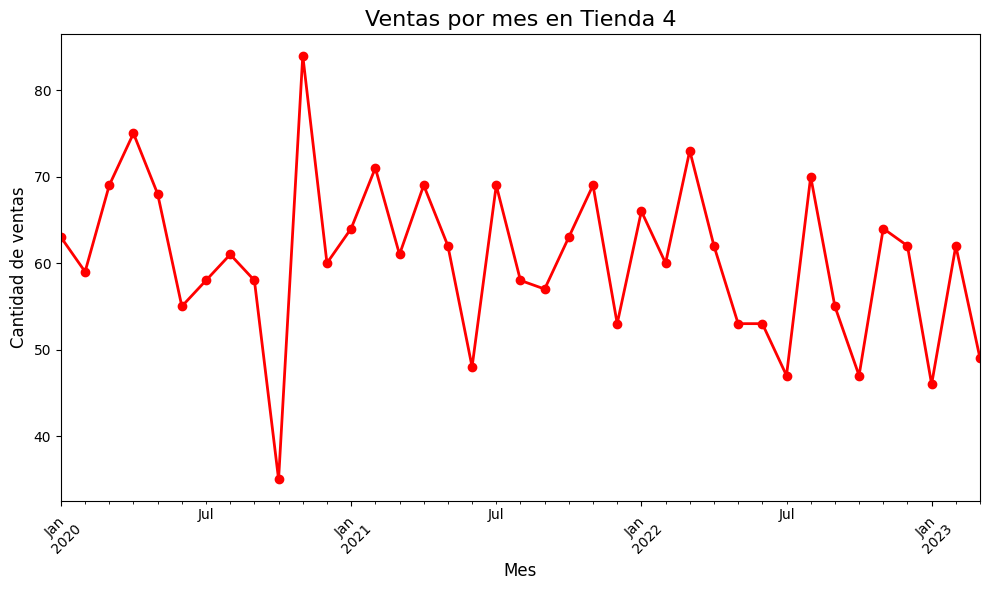

In [14]:
# Configura datos y grafica ventas por mes para cada tienda
for nombre, (df, color) in tiendas.items():
    # Convierte "Fecha de Compra" a datetime
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)

    # Agrupa por mes y cuenta ventas
    ventas_por_fecha = df.groupby(df['Fecha de Compra'].dt.to_period('M')).size()

    # Grafica las ventas
    plt.figure(figsize=(10, 6))
    ventas_por_fecha.plot(kind='line', color=color, marker='o', linestyle='-', linewidth=2)

    # Títulos y etiquetas
    plt.title(f'Ventas por mes en {nombre}', fontsize=16)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Cantidad de ventas', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Muestra gráfico
    plt.show()

# 7. Distribución de ventas por categoria

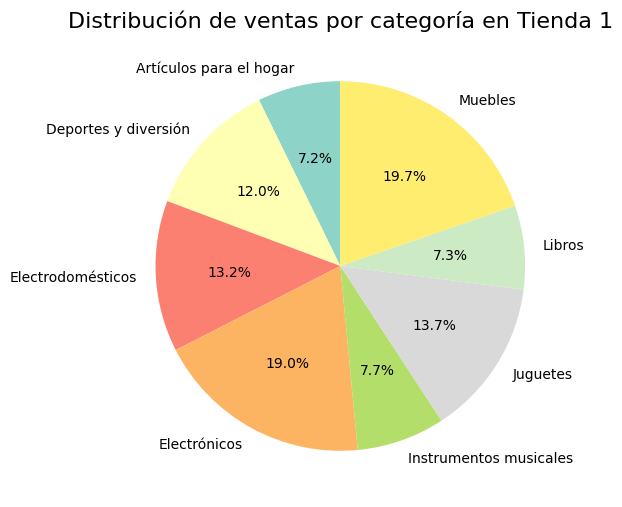

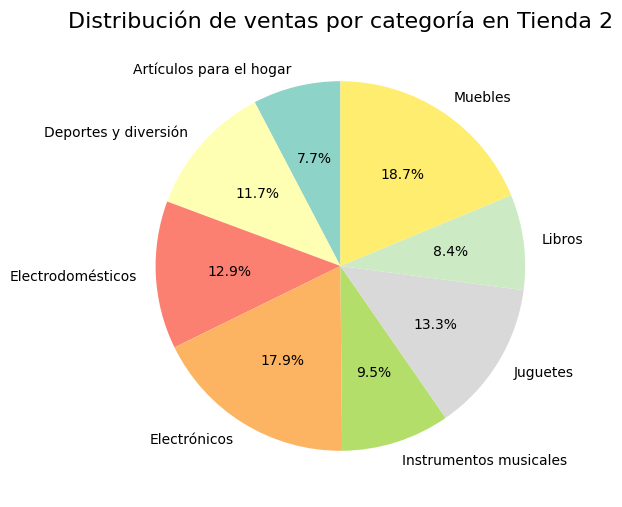

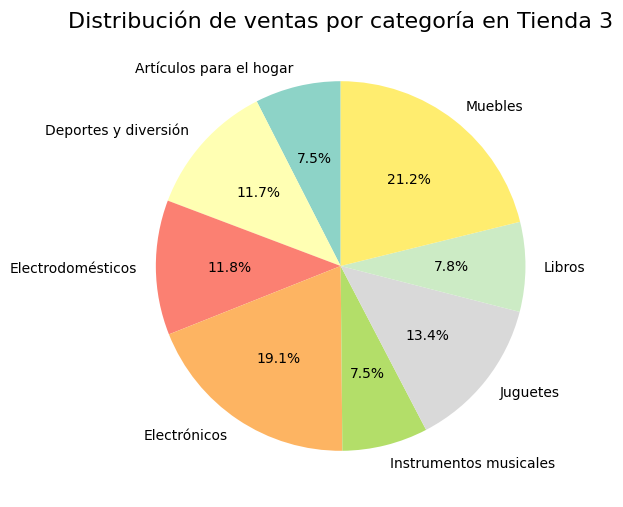

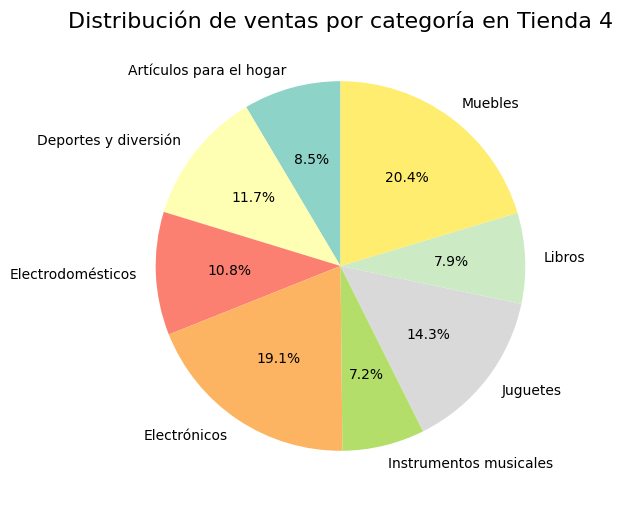

In [16]:
# Grafica distribución de ventas por categoría para cada tienda
for nombre, (df, _) in tiendas.items():
    # Agrupa por categoría y cuenta ventas
    categoria_ventas = df.groupby('Categoría del Producto').size()

    # Crea gráfico de pastel
    plt.figure(figsize=(8, 6))
    categoria_ventas.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

    # Formato
    plt.title(f'Distribución de ventas por categoría en {nombre}', fontsize=16)
    plt.ylabel('')  # Eliminar la etiqueta del eje y

    # Muestra gráfico
    plt.show()

# 8. Distribución de ventas por ubicación geofráfica

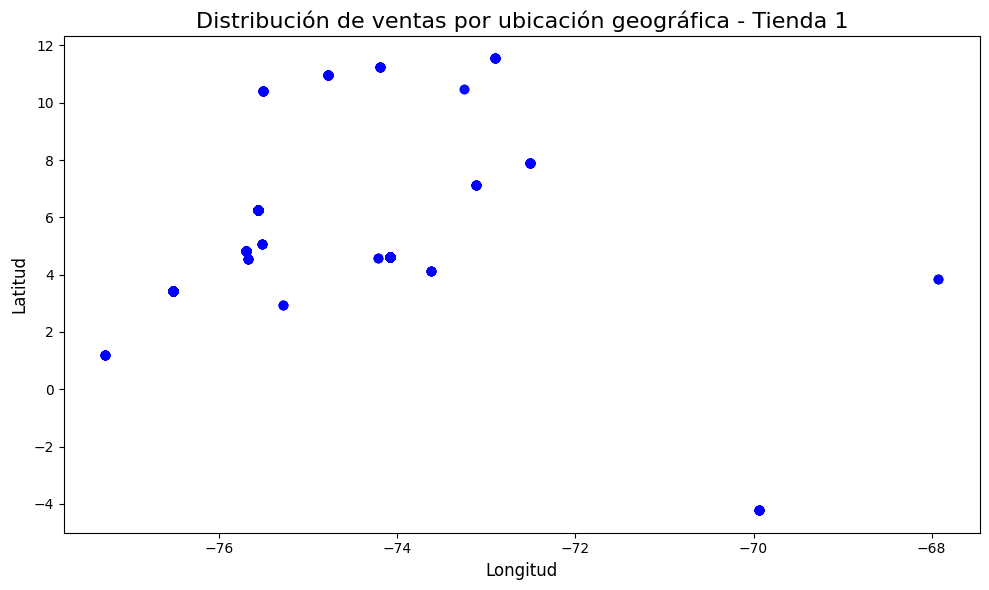

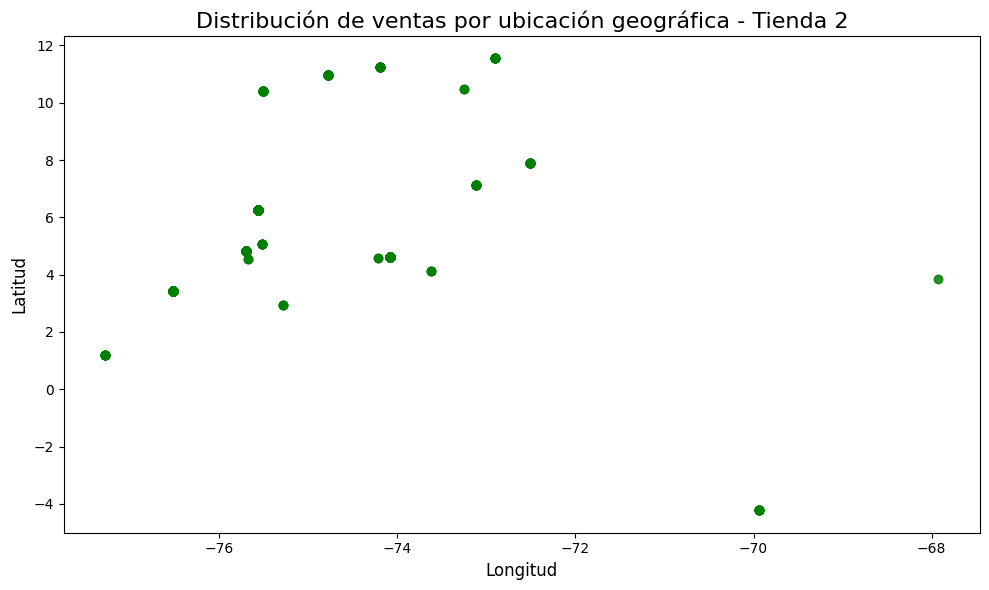

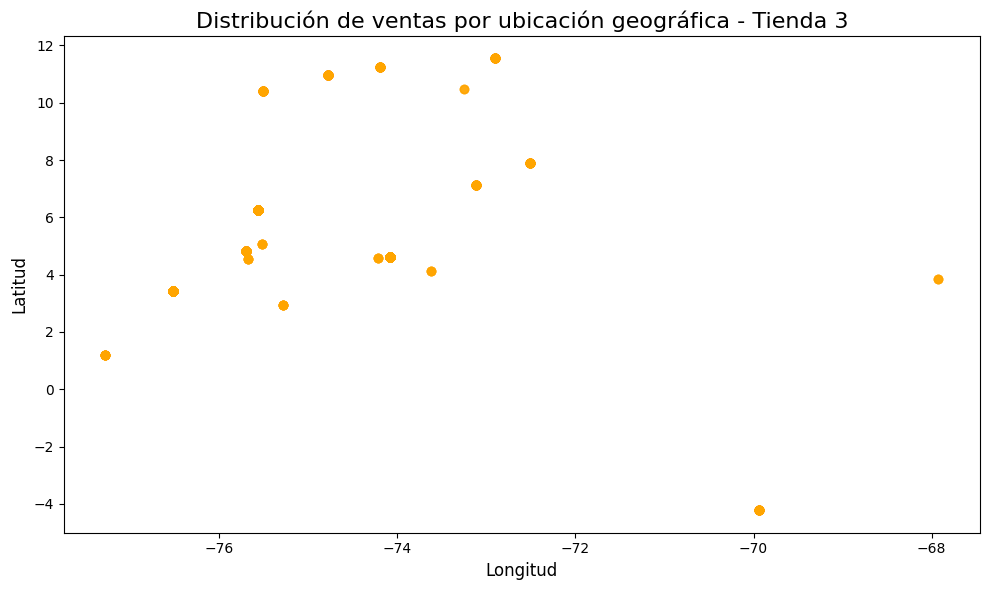

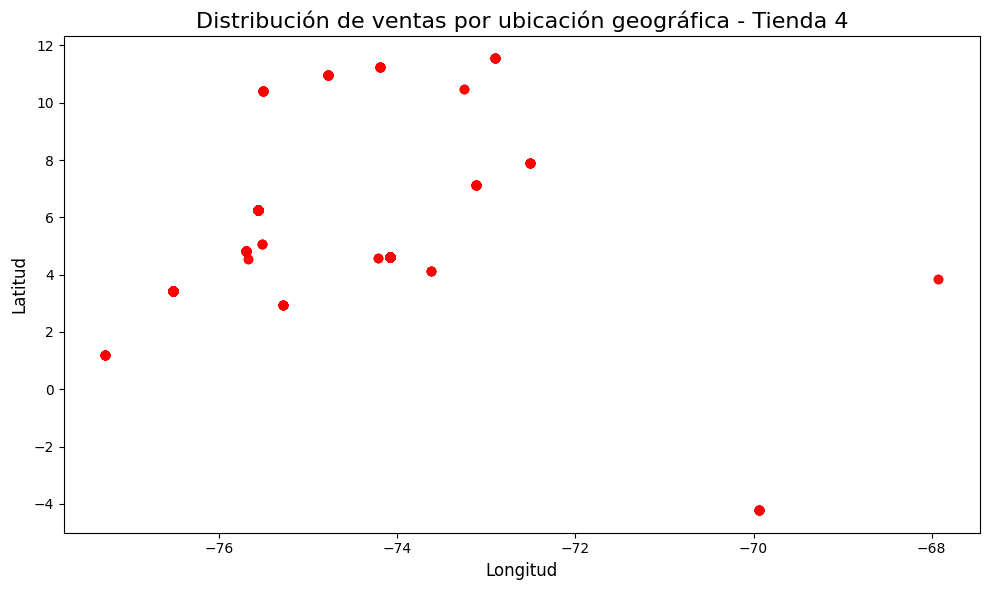

In [15]:
# Crea gráficos de dispersión para las ventas de cada tienda
def scatter_plot(tienda, tienda_nombre, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(tienda['lon'], tienda['lat'], alpha=0.6, color=color)
    plt.title(f"Distribución de ventas por ubicación geográfica - {tienda_nombre}", fontsize=16)
    plt.xlabel('Longitud', fontsize=12)
    plt.ylabel('Latitud', fontsize=12)
    plt.tight_layout()
    plt.show()

# Llama a la función para cada tienda
scatter_plot(tienda1, 'Tienda 1', 'blue')
scatter_plot(tienda2, 'Tienda 2', 'green')
scatter_plot(tienda3, 'Tienda 3', 'orange')
scatter_plot(tienda4, 'Tienda 4', 'red')

# 9. Crecimiento de ingresos

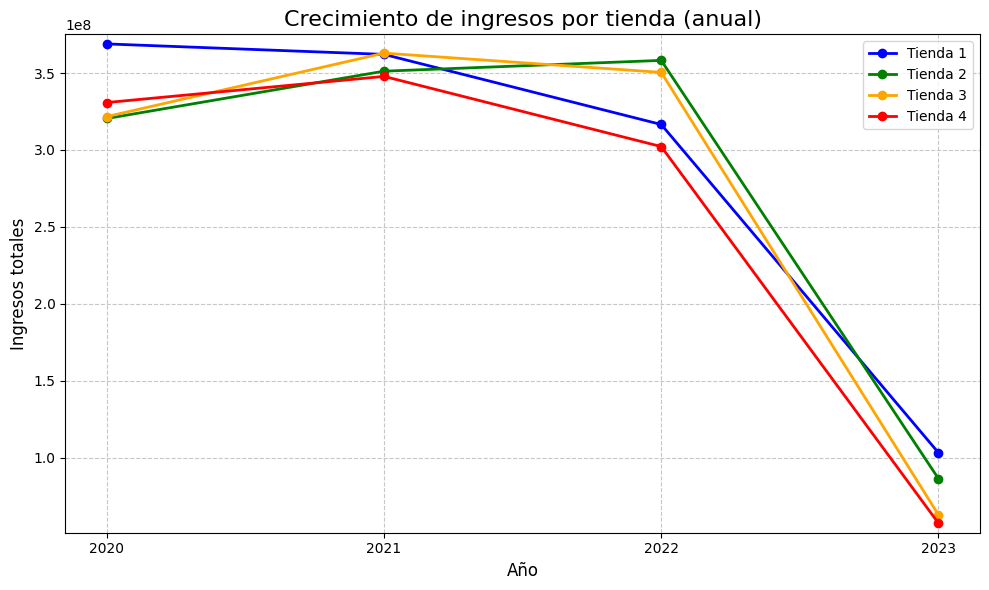

In [45]:
# Recolecta datos para determinar los límites del eje Y y los años presentes
ingresos_todos = []
años_unicos = set()
for nombre, (df, _) in tiendas.items():
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)
    ingresos_por_año = df.groupby(df['Fecha de Compra'].dt.year)['Precio'].sum()
    ingresos_todos.append(ingresos_por_año)
    años_unicos.update(ingresos_por_año.index)

# Crea una figura para el gráfico unificado
plt.figure(figsize=(10, 6))

# Procesa y grafica los ingresos por año para cada tienda
for nombre, (df, color) in tiendas.items():
    # Convierte "fecha de Compra" a datetime
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)

    # Agrupa por año y suma los ingresos (total de "Precio" por año)
    ingresos_por_año = df.groupby(df['Fecha de Compra'].dt.year)['Precio'].sum()

    # Grafica la serie de tiempo como línea
    ingresos_por_año.plot(kind='line', color=color, marker='o', linestyle='-',
                         linewidth=2, label=nombre)

# Añade título y etiquetas
plt.title('Crecimiento de ingresos por tienda (anual)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos totales', fontsize=12)
plt.xticks(sorted(años_unicos), rotation=0)  # Solo años enteros
plt.ylim(y_min, y_max)  # Rango dinámico con margen estrecho para resaltar diferencias
plt.grid(True, linestyle='--', alpha=0.7)  # Cuadrícula para mejorar legibilidad
plt.legend()  # Muestra la leyenda con los nombres de las tiendas
plt.tight_layout()

# Muestra gráfico
plt.show()

---

### Informe Final: Análisis de Tiendas para Determinar la Más Viable para Cerrar

#### **Introducción**

El presente informe tiene como objetivo llevar a cabo un análisis exhaustivo del desempeño de las distintas tiendas que conforman la operación del Sr. Juan. El propósito es identificar cuál de ellas presenta los peores resultados, de manera que se pueda tomar una decisión informada sobre el posible **cierre de operaciones**. En este análisis, se han considerado factores clave como los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, así como los costos de envío asociados a cada tienda.

A continuación, se presentan los hallazgos y la justificación detrás de la recomendación para proceder con el cierre de una de las tiendas.

#### **Desarrollo**

##### **1. Ingresos Totales por Tienda**

El primer parámetro fundamental a evaluar es la capacidad de cada tienda para generar ingresos. Los resultados obtenidos para cada una de ellas son los siguientes:

- **Tienda 1**: $1,150,880,400 COP

- **Tienda 2**: $1,116,343,500 COP

- **Tienda 3**: $1,098,019,600 COP

- **Tienda 4**: $1,038,375,700 COP

**Gráfico 1: Ingresos Totales por Tienda**

Se puede observar que la Tienda 4 muestra un rendimiento inferior en términos de ingresos en comparación con las otras tres.

##### **2. Análisis de las Categorías de Productos Más y Menos Vendidas**

El análisis de las categorías de productos más y menos vendidas proporciona información valiosa sobre las preferencias de los consumidores. A continuación, se presentan los resultados:

- **Tienda 1**: Las categorías más vendidas fueron ‘Muebles’ y ‘Electrónicos’. Las menos vendida correspondio a ‘Articulos para el hogar’.
- **Tienda 2**: ‘Muebles’ y ‘Electrónicos’ destacaron como las más vendidas, mientras que ‘Articulos para el hogar’ tuvo un desempeño bajo.
- **Tienda 3**: Las más vendidas fueron ‘Muebles’ y ‘Electrónicos’. Las menos vendidas fueron ‘Instrumentos musicales’ y ‘Articulos para el hogar’.
- **Tienda 4**: ‘Muebles’ y ‘Electrónicos’ lideraron las ventas, con ‘Instrumentos musciales’ como la categoría menos demandada.

**Gráfico 2: Ventas por Categoría**

A partir de este análisis, podemos destacar que la Tienda 3 y 4 presentan una debilidad clara en la categoría de ‘Instrumentos musicales’, lo que podría estar limitando su capacidad para captar una mayor parte del mercado. Esta área de baja venta es un punto a tener en cuenta cuando se evalúa la rentabilidad de la tienda.

##### **3. Calificación Promedio por Tienda**

Las calificaciones otorgadas por los clientes son un indicador fundamental de la calidad de la experiencia de compra. Las calificaciones promedio de cada tienda son las siguientes:

- **Tienda 1**: 3.98
- **Tienda 2**: 4.04
- **Tienda 3**: 4.05
- **Tienda 4**: 4.00

**Gráfico 3: Calificación Promedio de los Clientes**

Aunque las diferencias en las calificaciones no son enormes, la Tienda 1 presenta la calificación más baja, lo que podría reflejar insatisfacción por parte de los clientes. Esta tendencia negativa podría tener un impacto en la lealtad y la repetición de compras, lo que hace que la tienda sea menos competitiva en el largo plazo.

##### **4. Productos Más y Menos Vendidos**

El análisis de los productos más vendidos y aquellos con menores ventas proporciona una visión adicional sobre la efectividad de la estrategia de inventario de cada tienda. A continuación, se presentan los productos más y menos vendidos:

- **Tienda 1**: Productos más vendidos: ‘Armario’, ‘Tv led uhd 4k’. Menos vendidos: ‘Auriculares con micrófono’, ‘Celular ABXY’.
- **Tienda 2**: Productos más vendidos: ‘Iniciando en programación’, ‘Microondas’. Menos vendidos: ‘Juego de mesa’, ‘Impresora’.
- **Tienda 3**: Productos más vendidos: ‘Kit de bancas’, ‘Mesa de comedor’. Menos vendidos: ‘Bloques de construcción’, ‘Set de vasos’.
- **Tienda 4**: Productos más vendidos: ‘Cama box’, ‘Cubertería’. Menos vendidos: ‘Guitarra eléctrica’, ‘Armario’.

El análisis revela que algunas tiendas presentan desequilibrios en su inventario, con productos populares que impulsan las ventas y otros que requieren ajustes para mejorar su desempeño y alineación con la demanda.

##### **5. Costo de Envío Promedio por Tienda**

El costo de envío es un factor que impacta directamente los márgenes de beneficio y la percepción de valor por parte de los clientes. A continuación se presentan los costos promedio de envío por tienda:

- **Tienda 1**: $26,018 COP

- **Tienda 2**: $25,216 COP

- **Tienda 3**: $24,805 COP

- **Tienda 4**: $23,459 COP


**Gráfico 5: Costo de Envío Promedio**

Si bien la Tienda 4 presenta el costo de envío más bajo, lo que podría parecer una ventaja competitiva, no parece suficiente para contrarrestar sus deficiencias en otras áreas. El bajo rendimiento en términos de ventas sugiere que el bajo costo de envío no es un factor decisivo en su desempeño general.

#### **Conclusión y Recomendación**

Tras considerar todos los factores relevantes, la Tienda 4 emerge como la opción menos viable para seguir operando. A pesar de un costo de envío más bajo, muestra una clara tendencia a la baja en las ventas a lo largo del tiempo. Sus productos menos vendidos reflejan una estrategia de inventario deficiente. Además, los ingresos totales de la Tienda 4 no son lo suficientemente sólidos para justificar su continuidad.

Por otro lado, aunque la Tienda 1 presenta un mayor potencial, es importante señalar que enfrenta problemas de satisfacción al cliente y altos costos de envío. Estas áreas deben ser atendidas con urgencia para mejorar su desempeño general y garantizar su viabilidad a largo plazo.

Por lo tanto, **se recomienda proceder con el cierre de operaciones de la Tienda 4.** Este paso permitirá optimizar los recursos y concentrar los esfuerzos en aquellas tiendas con mayor potencial de crecimiento y rentabilidad, siempre atendiendo los aspectos a mejorar, como los identificados en la Tienda 1.

---